# Crop price forecasting

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

**Data preprocessing , Data cleaning**

In [7]:
df_crop=pd.read_csv('Optimizing Agriculture Production.csv')
df_crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df_2022=pd.read_csv('all crop 2022.csv')
df_2023=pd.read_csv('all crop 2023.csv')

In [9]:
print(df_2022.shape)
print(df_2023.shape)

(28, 14)
(28, 14)


In [10]:
df_2022.head()

,SI. No.\nTHE,Commodities AN,January,February,March,April,May,June,July,August\n3RR,September,October\n319gar,November\n199R,December\nfactor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Paddy ET,1816.0,1806.0,1802.0,1785.0,1748.0,1727.0,1730.0,1753.0,1774.0,1886.0,1910.0,1910.0
2,2.0,rice,3568.0,3541.0,3551.0,3568.0,3538.0,3573.0,3564.0,3570.0,3590.0,3619.0,3637.0,3650.0
3,3.0,Bajra TERR,1658.0,1642.0,1647.0,1642.0,1654.0,1672.0,1716.0,1793.0,1797.0,1842.0,1945.0,1992.0
4,4.0,Barley,1728.0,1764.0,1704.0,1791.0,1735.0,1826.0,1849.0,1923.0,1983.0,2053.0,2095.0,2185.0


In [11]:
df_2022.dropna(inplace=True)
df_2023.dropna(inplace=True)

In [12]:
df_2022.drop('SI. No.\nTHE', axis=1 , inplace=True)
df_2023.drop('SI. No.\nTHE HCT', axis=1, inplace=True)

In [13]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodities AN   27 non-null     object 
 1   January          27 non-null     float64
 2   February         27 non-null     float64
 3   March            27 non-null     float64
 4   April            27 non-null     float64
 5   May              27 non-null     float64
 6   June             27 non-null     float64
 7   July             27 non-null     float64
 8   August
3RR       27 non-null     float64
 9   September        27 non-null     float64
 10  October
319gar   27 non-null     float64
 11  November
199R    27 non-null     float64
 12  December
factor  27 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.0+ KB


In [14]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodities AN   27 non-null     object 
 1   January          27 non-null     float64
 2   February         27 non-null     float64
 3   March            27 non-null     float64
 4   April
30         27 non-null     float64
 5   May              27 non-null     float64
 6   June             27 non-null     float64
 7   July             27 non-null     float64
 8   August
30Rd      27 non-null     float64
 9   September Rider  27 non-null     float64
 10  October          27 non-null     float64
 11  November
TOOR    27 non-null     float64
 12  December
PARISR  27 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.0+ KB


In [15]:
df_2022.columns

Index(['Commodities AN', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August\n3RR', 'September', 'October\n319gar',
       'November\n199R', 'December\nfactor'],
      dtype='object')

In [16]:
new_columns_2022 = {
    'Commodities AN': 'label',
    'January': '2022-01',
    'February': '2022-02',
    'March': '2022-03',
    'April': '2022-04',
    'May': '2022-05',
    'June': '2022-06',
    'July': '2022-07',
    'August\n3RR': '2022-08',
    'September': '2022-09',
    'October\n319gar': '2022-10',
    'November\n199R': '2022-11',
    'December\nfactor': '2022-12'
}

df_2022 = df_2022.rename(columns=new_columns_2022)

In [17]:
new_columns_2023 = {
    'Commodities AN': 'label',
    'January': '2023-01',
    'February': '2023-02',
    'March': '2023-03',
    'April\n30': '2023-04',
    'May': '2023-05',
    'June': '2023-06',
    'July': '2023-07',
    'August\n30Rd': '2023-08',
    'September Rider': '2023-09',
    'October': '2023-10',
    'November\nTOOR': '2023-11',
    'December\nPARISR': '2023-12'
}

df_2023 = df_2023.rename(columns=new_columns_2023)

In [18]:
df_2022.head()

,label,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1,Paddy ET,1816.0,1806.0,1802.0,1785.0,1748.0,1727.0,1730.0,1753.0,1774.0,1886.0,1910.0,1910.0
2,rice,3568.0,3541.0,3551.0,3568.0,3538.0,3573.0,3564.0,3570.0,3590.0,3619.0,3637.0,3650.0
3,Bajra TERR,1658.0,1642.0,1647.0,1642.0,1654.0,1672.0,1716.0,1793.0,1797.0,1842.0,1945.0,1992.0
4,Barley,1728.0,1764.0,1704.0,1791.0,1735.0,1826.0,1849.0,1923.0,1983.0,2053.0,2095.0,2185.0
5,muskmelon,2461.0,2525.0,2528.0,2505.0,2520.0,2474.0,2363.0,2367.0,2313.0,2212.0,2258.0,2355.0


In [19]:
df_2023.head()

,label,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
1,Paddy ET,1881.0,1887.0,1888.0,1878.0,1869.0,1895.0,1902.0,1954.0,1994.0,2045.0,2093.0,2151.0
2,Rice,3675.0,3673.0,3680.0,3699.0,3695.0,3729.0,3800.0,3862.0,3965.0,3996.0,4011.0,4001.0
3,Bajra TERR,2020.0,2050.0,2179.0,2282.0,2274.0,2303.0,2348.0,2449.0,2278.0,2345.0,2465.0,2537.0
4,Barley,2194.0,2228.0,2267.0,2552.0,2592.0,2611.0,2600.0,2685.0,2618.0,2639.0,2674.0,2668.0
5,muskmelon,2430.0,2456.0,2503.0,2610.0,2630.0,2659.0,2770.0,2811.0,2801.0,2835.0,3126.0,3238.0


In [20]:
df_price=pd.concat([df_2022,df_2023],axis=1)

In [21]:
df_price.head()

,label,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
1,Paddy ET,1816.0,1806.0,1802.0,1785.0,1748.0,1727.0,1730.0,1753.0,1774.0,...,1888.0,1878.0,1869.0,1895.0,1902.0,1954.0,1994.0,2045.0,2093.0,2151.0
2,rice,3568.0,3541.0,3551.0,3568.0,3538.0,3573.0,3564.0,3570.0,3590.0,...,3680.0,3699.0,3695.0,3729.0,3800.0,3862.0,3965.0,3996.0,4011.0,4001.0
3,Bajra TERR,1658.0,1642.0,1647.0,1642.0,1654.0,1672.0,1716.0,1793.0,1797.0,...,2179.0,2282.0,2274.0,2303.0,2348.0,2449.0,2278.0,2345.0,2465.0,2537.0
4,Barley,1728.0,1764.0,1704.0,1791.0,1735.0,1826.0,1849.0,1923.0,1983.0,...,2267.0,2552.0,2592.0,2611.0,2600.0,2685.0,2618.0,2639.0,2674.0,2668.0
5,muskmelon,2461.0,2525.0,2528.0,2505.0,2520.0,2474.0,2363.0,2367.0,2313.0,...,2503.0,2610.0,2630.0,2659.0,2770.0,2811.0,2801.0,2835.0,3126.0,3238.0


In [22]:
df_price=df_price.T.drop_duplicates()

In [23]:
df_price=df_price.T

In [24]:
df_price

,label,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
1,Paddy ET,1816.0,1806.0,1802.0,1785.0,1748.0,1727.0,1730.0,1753.0,1774.0,...,1888.0,1878.0,1869.0,1895.0,1902.0,1954.0,1994.0,2045.0,2093.0,2151.0
2,rice,3568.0,3541.0,3551.0,3568.0,3538.0,3573.0,3564.0,3570.0,3590.0,...,3680.0,3699.0,3695.0,3729.0,3800.0,3862.0,3965.0,3996.0,4011.0,4001.0
3,Bajra TERR,1658.0,1642.0,1647.0,1642.0,1654.0,1672.0,1716.0,1793.0,1797.0,...,2179.0,2282.0,2274.0,2303.0,2348.0,2449.0,2278.0,2345.0,2465.0,2537.0
4,Barley,1728.0,1764.0,1704.0,1791.0,1735.0,1826.0,1849.0,1923.0,1983.0,...,2267.0,2552.0,2592.0,2611.0,2600.0,2685.0,2618.0,2639.0,2674.0,2668.0
5,muskmelon,2461.0,2525.0,2528.0,2505.0,2520.0,2474.0,2363.0,2367.0,2313.0,...,2503.0,2610.0,2630.0,2659.0,2770.0,2811.0,2801.0,2835.0,3126.0,3238.0
6,maize,1642.0,1632.0,1606.0,1640.0,1650.0,1690.0,1725.0,1782.0,1798.0,...,2052.0,2131.0,2146.0,2138.0,2180.0,2251.0,2221.0,2180.0,2225.0,2285.0
7,Ragi,2822.0,2890.0,2916.0,2918.0,2903.0,2876.0,2917.0,2886.0,2820.0,...,3038.0,2963.0,3015.0,2925.0,2888.0,2823.0,2750.0,2736.0,2798.0,2806.0
8,lentil,2065.0,2071.0,2079.0,2143.0,2151.0,2143.0,2059.0,2093.0,2138.0,...,2339.0,2384.0,2352.0,2316.0,2409.0,2486.0,2516.0,2570.0,2719.0,2812.0
9,blackgram,5100.0,5200.0,5225.0,5546.0,5490.0,5423.0,5405.0,5526.0,5564.0,...,5457.0,5354.0,5265.0,5239.0,5308.0,5368.0,5282.0,5302.0,5313.0,5346.0
10,mango,6324.0,6716.0,6617.0,6758.0,6781.0,6535.0,6492.0,6628.0,6715.0,...,6500.0,6411.0,6279.0,6317.0,6755.0,6900.0,6842.0,7146.0,6945.0,6974.0


In [25]:
df_price.drop(index=[1,3,4,7,27] , inplace=True)

In [26]:
df_price.reset_index(drop=True,inplace=True)

In [27]:
df_price.head()

,label,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,rice,3568.0,3541.0,3551.0,3568.0,3538.0,3573.0,3564.0,3570.0,3590.0,...,3680.0,3699.0,3695.0,3729.0,3800.0,3862.0,3965.0,3996.0,4011.0,4001.0
1,muskmelon,2461.0,2525.0,2528.0,2505.0,2520.0,2474.0,2363.0,2367.0,2313.0,...,2503.0,2610.0,2630.0,2659.0,2770.0,2811.0,2801.0,2835.0,3126.0,3238.0
2,maize,1642.0,1632.0,1606.0,1640.0,1650.0,1690.0,1725.0,1782.0,1798.0,...,2052.0,2131.0,2146.0,2138.0,2180.0,2251.0,2221.0,2180.0,2225.0,2285.0
3,lentil,2065.0,2071.0,2079.0,2143.0,2151.0,2143.0,2059.0,2093.0,2138.0,...,2339.0,2384.0,2352.0,2316.0,2409.0,2486.0,2516.0,2570.0,2719.0,2812.0
4,blackgram,5100.0,5200.0,5225.0,5546.0,5490.0,5423.0,5405.0,5526.0,5564.0,...,5457.0,5354.0,5265.0,5239.0,5308.0,5368.0,5282.0,5302.0,5313.0,5346.0


In [28]:
temp=df_price.T.reset_index()
temp.columns = temp.iloc[0]

# Drop the first row
temp = temp.drop(0)

# Reset the index
temp.reset_index(drop=True, inplace=True)

In [29]:
temp.rename(columns={'label':'month'},inplace=True)
df_price=temp

In [30]:
df_price.drop(index=[12] , inplace=True)

In [31]:
df_price['month'] = pd.to_datetime(df_price['month'])

In [32]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 24
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        24 non-null     datetime64[ns]
 1   rice         24 non-null     object        
 2   muskmelon    24 non-null     object        
 3   maize        24 non-null     object        
 4   lentil       24 non-null     object        
 5   blackgram    24 non-null     object        
 6   mango        24 non-null     object        
 7   pigeonpeas   24 non-null     object        
 8   orange       24 non-null     object        
 9   coconut      24 non-null     object        
 10  chickpea     24 non-null     object        
 11  coffee       24 non-null     object        
 12  papaya       24 non-null     object        
 13  mungbean     24 non-null     object        
 14  mothbeans    24 non-null     object        
 15  apple        24 non-null     object        
 16  kidneybean

In [33]:
Num_cols=df_price.columns[1:]
df_price[Num_cols] = df_price[Num_cols].astype(float)

In [34]:
df_price.set_index('month',inplace=True)

In [35]:
df_price.head()

,rice,muskmelon,maize,lentil,blackgram,mango,pigeonpeas,orange,coconut,chickpea,...,mungbean,mothbeans,apple,kidneybeans,pomegranate,cotton,Jute,grapes,banana,watermelon
month,,,,,,,,,,,,,,,,,,,,,
2022-01-01,3568.0,2461.0,1642.0,2065.0,5100.0,6324.0,5998.0,7561.0,8039.0,5426.0,...,5526.0,5721.0,9641.0,4442.0,4735.0,5453.0,5380.0,3515.0,1182.0,2899.0
2022-02-01,3541.0,2525.0,1632.0,2071.0,5200.0,6716.0,6148.0,7712.0,8192.0,5518.0,...,5535.0,5729.0,9496.0,4774.0,5320.0,5666.0,5874.0,3481.0,1066.0,3543.0
2022-03-01,3551.0,2528.0,1606.0,2079.0,5225.0,6617.0,6271.0,7832.0,8215.0,5603.0,...,5498.0,6413.0,9369.0,5249.0,5344.0,5674.0,6207.0,3488.0,972.0,1690.0
2022-04-01,3568.0,2505.0,1640.0,2143.0,5546.0,6758.0,6581.0,7975.0,8256.0,5502.0,...,6158.0,6721.0,9644.0,6125.0,5842.0,5717.0,6416.0,3545.0,1195.0,1438.0
2022-05-01,3538.0,2520.0,1650.0,2151.0,5490.0,6781.0,6695.0,8225.0,8436.0,5394.0,...,6418.0,6794.0,9514.0,6512.0,5731.0,5871.0,6627.0,3552.0,1277.0,1757.0


In [36]:
# df_price.to_csv(r'Z:\Capstone-cropwise\artifacts\Time_series_price.csv')

# Time Series Analysis

**1. Time series plot for all crops**

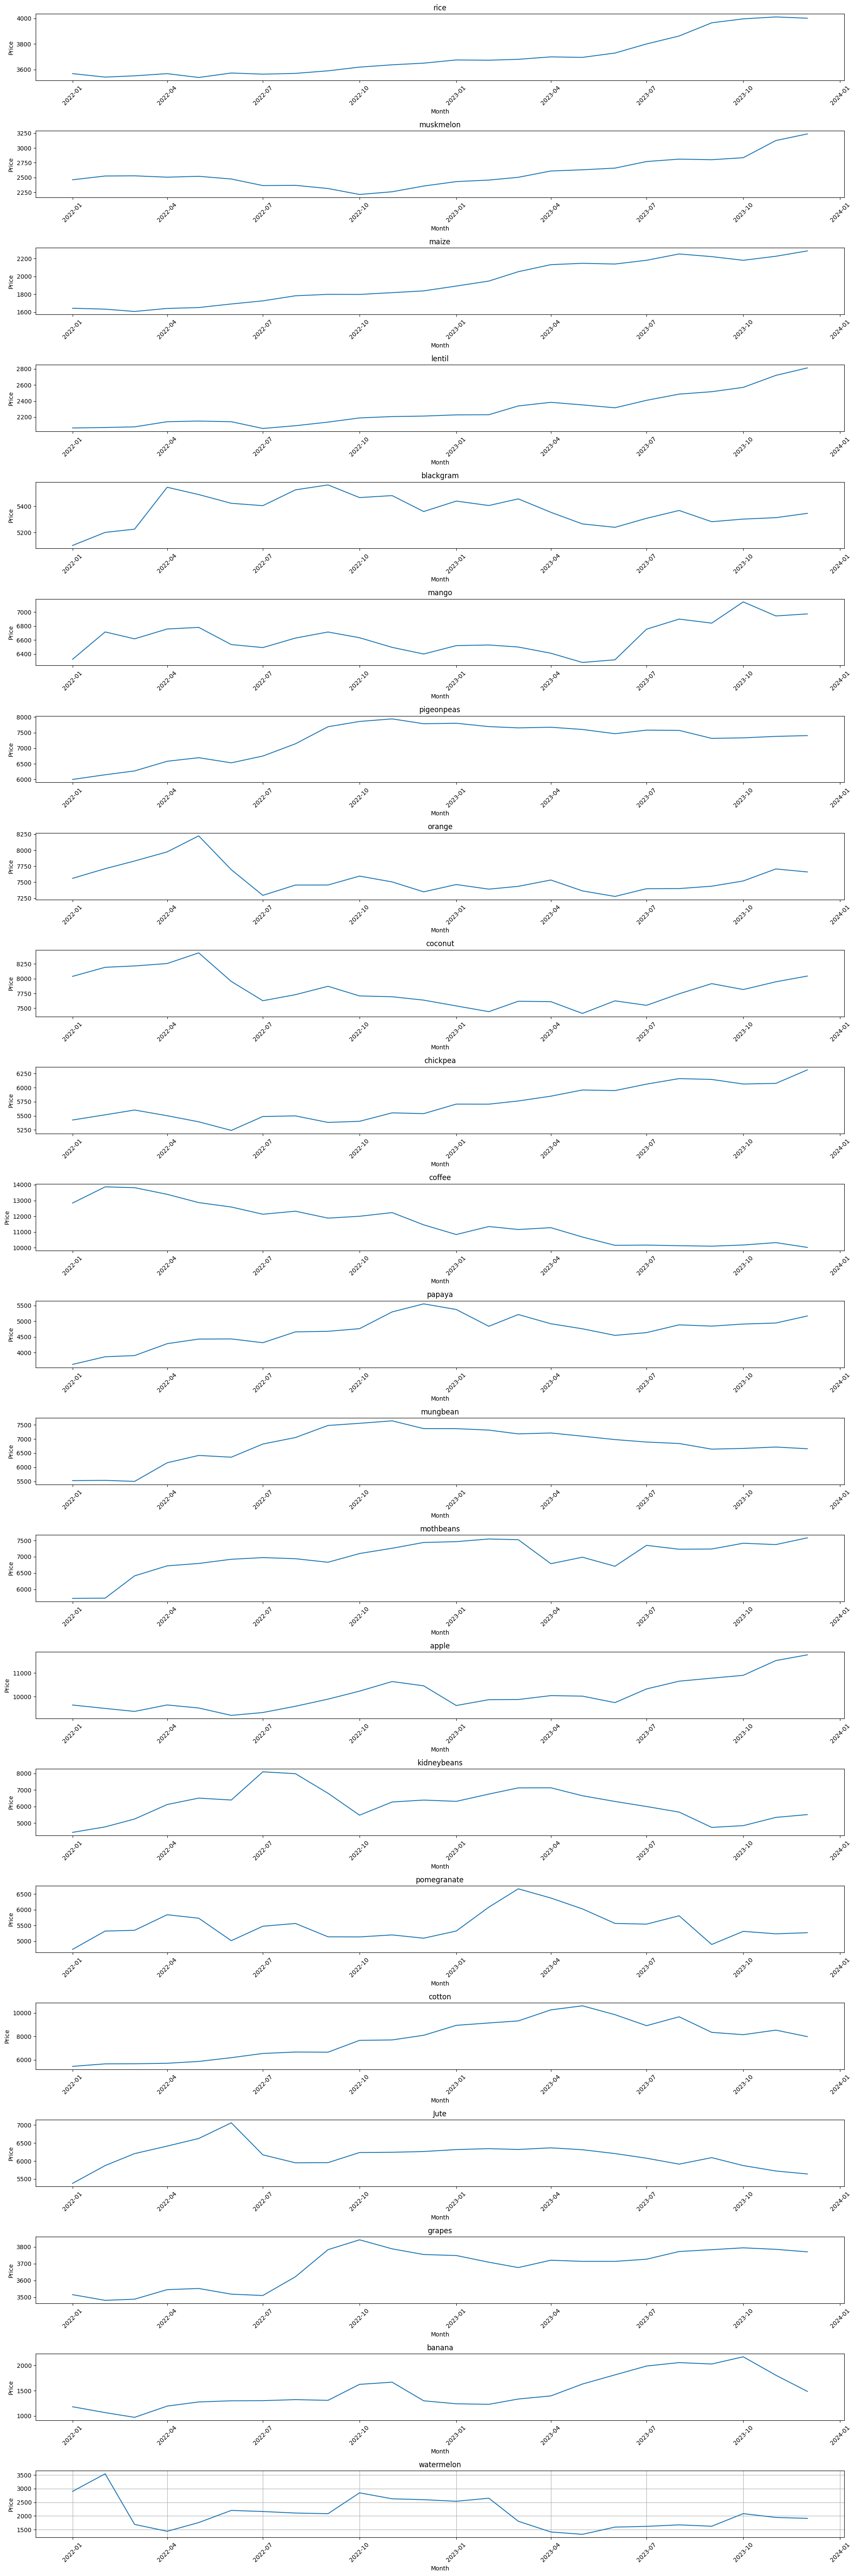

In [37]:

fig, axs = plt.subplots(22,1 , figsize=(20, 60))

axs = axs.flatten()


for i, (column, ax) in enumerate(zip(df_price.columns, axs)):
    ax.plot(df_price.index, df_price[column])
    ax.set_title(column)
    ax.set_xlabel('Month')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.grid()
plt.show()

**2. Calculate PACF and ACF**

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

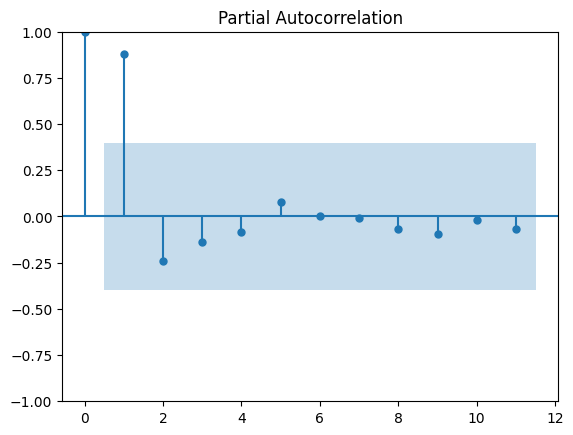

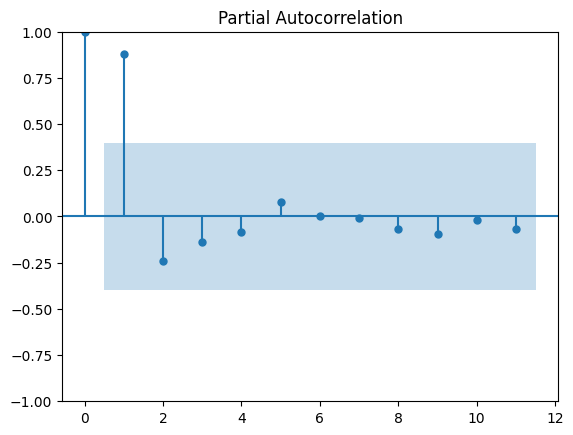

In [39]:
plot_pacf(df_price['rice'], lags=11)

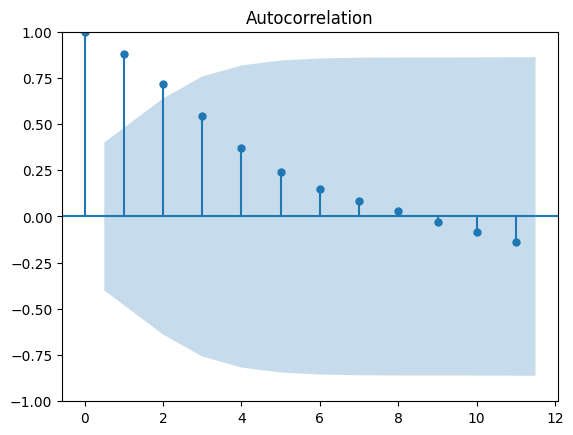

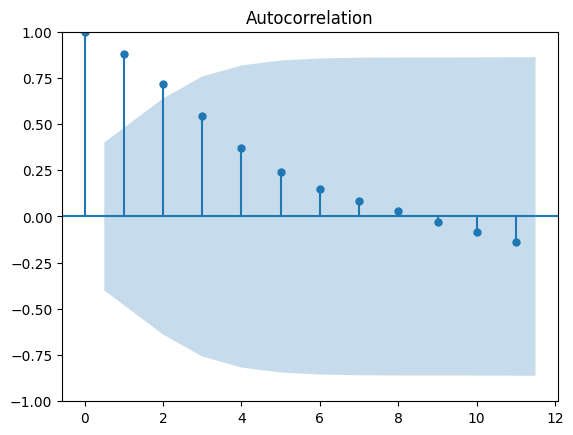

In [40]:
plot_acf(df_price['rice'], lags=11)

**Using permutation**

In [41]:
p_range = range(0, 5)
d_range = range(0, 3)
q_range = range(0, 6)

orders= [(p,d,q) for p in p_range for d in d_range for q in q_range ]

- Tring all combination to find min root_mean_squared_error for 'rice' price

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train_data = df_price['rice'].iloc[0:19]  
test_data = df_price['rice'].iloc[18:]
error_dict={}
for order in orders:
    try:
        model = ARIMA(train_data, order=order)
        fitted_model = model.fit()
        forecast = fitted_model.forecast(steps=6)
        error = np.sqrt(mean_squared_error(test_data, forecast))
        error_dict[order] = error
    except Exception as e:
        print(f"Error occurred for order {order}: {e}")
        continue


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

In [43]:
best_order = min(error_dict, key=error_dict.get)
best_rmse = error_dict[best_order]

print("Best order:", best_order)
print("RMSE:", best_rmse)

Best order: (4, 1, 3)
RMSE: 23.162796686132477


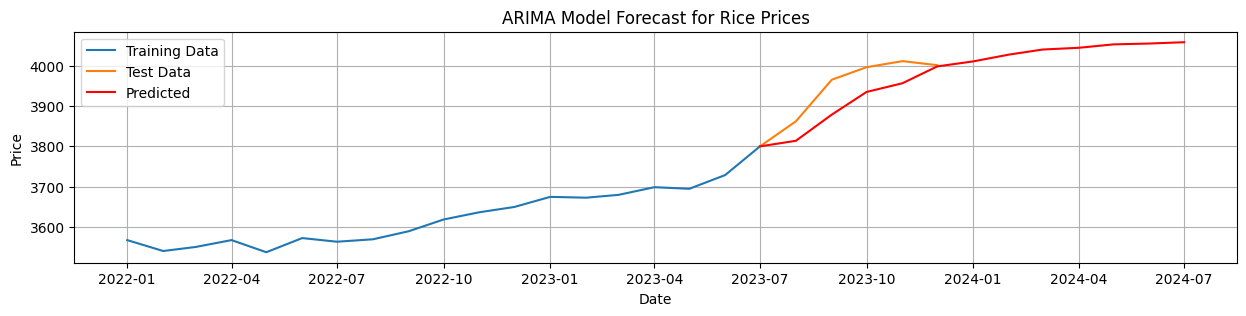

In [44]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA


train_data = df_price['rice'].iloc[0:19]  
test_data = df_price['rice'].iloc[18:]


model = ARIMA(train_data, order=(4,1,3))  # ARIMA(p,d,q) - 
fitted_model = model.fit()


forecast = fitted_model.forecast(steps=12)
forecast.loc[pd.Timestamp('2023-07-01')] = train_data[-1]
forecast.sort_index(inplace=True)

plt.figure(figsize=(15, 3))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast, label='Predicted', color='red')
plt.title('ARIMA Model Forecast for Rice Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


**Find the best order parameter for all crops**

In [45]:
# import numpy as np
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# columns=df_price.columns
# best_orders = []
# for col in columns:
#     train_data = df_price[col].iloc[:19]
#     test_data = df_price[col].iloc[18:]
#     error_dict = {}
    
#     for order in orders:
#         try:
#             model = ARIMA(train_data, order=order)
#             fitted_model = model.fit()
#             forecast = fitted_model.forecast(steps=6)
#             error = np.sqrt(mean_squared_error(test_data, forecast))
#             error_dict[order] = error
#         except Exception as e:
#             print(f"Error occurred for order {order}: {e}")
#             continue
    
#     best_order = min(error_dict, key=error_dict.get)
#     best_rmse = error_dict[best_order]
#     best_orders.append([col, best_order, best_rmse])

# best_orders_df = pd.DataFrame(best_orders, columns=['label', 'order', 'RMSE'])

#save
# best_orders_df.to_csv('best_orders.csv',index=False)

In [46]:
best_orders_df = pd.read_csv('best_orders.csv')
best_orders_df

,label,order,RMSE
0,rice,"(4, 1, 3)",23.162795
1,muskmelon,"(2, 2, 2)",109.816679
2,maize,"(2, 1, 4)",33.086671
3,lentil,"(1, 2, 0)",70.677855
4,blackgram,"(1, 2, 5)",23.067906
5,mango,"(1, 1, 0)",117.610589
6,pigeonpeas,"(3, 0, 1)",106.729443
7,orange,"(3, 2, 5)",92.228890
8,coconut,"(2, 0, 3)",57.085020
9,chickpea,"(2, 1, 2)",72.013323


In [47]:
for index, row in best_orders_df.iterrows():
    label = row['label']
    order = row['order']
    print(label,order[1])

rice 4
muskmelon 2
maize 2
lentil 1
blackgram 1
mango 1
pigeonpeas 3
orange 3
coconut 2
chickpea 2
coffee 0
papaya 1
mungbean 2
mothbeans 0
apple 4
kidneybeans 0
pomegranate 3
cotton 0
Jute 2
grapes 0
banana 1
watermelon 1


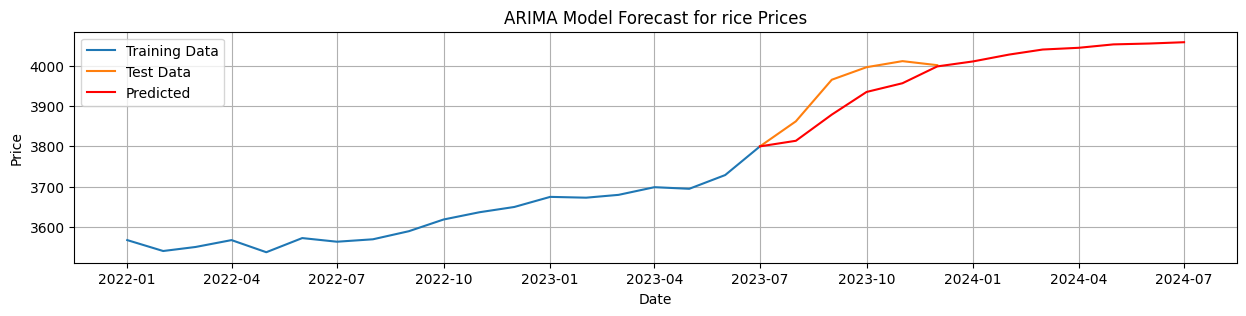

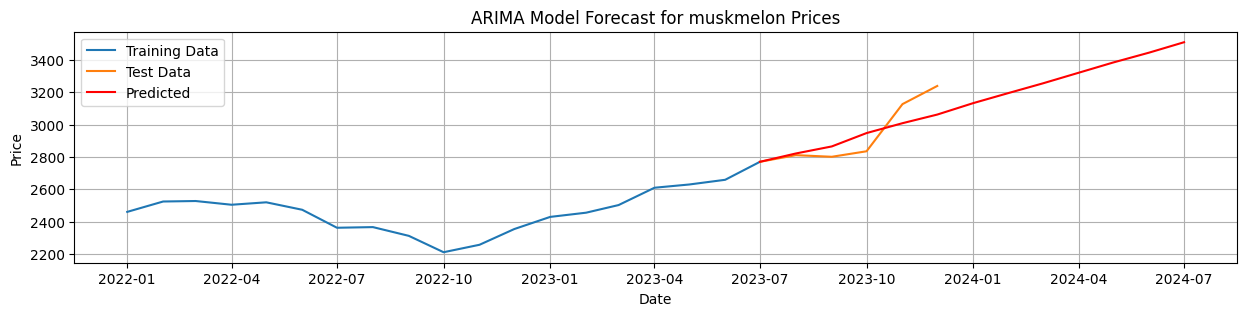

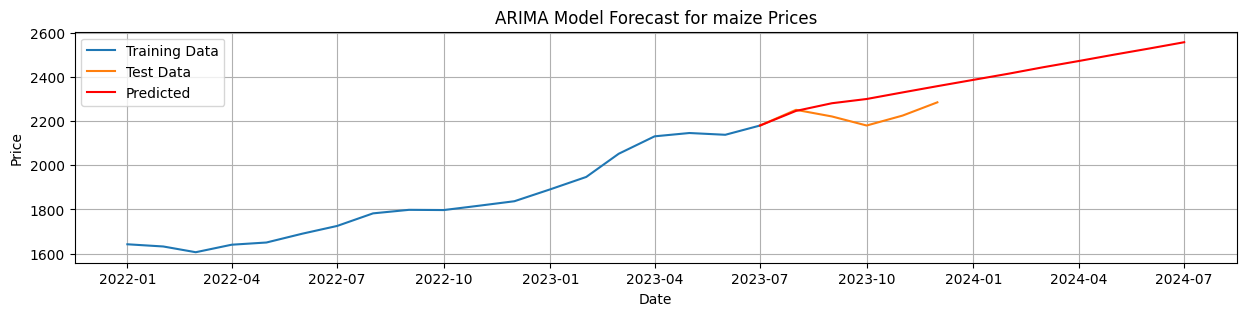

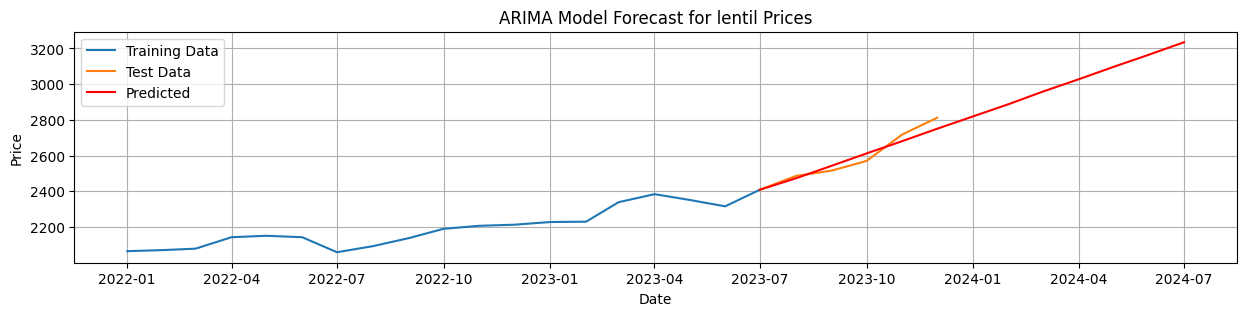

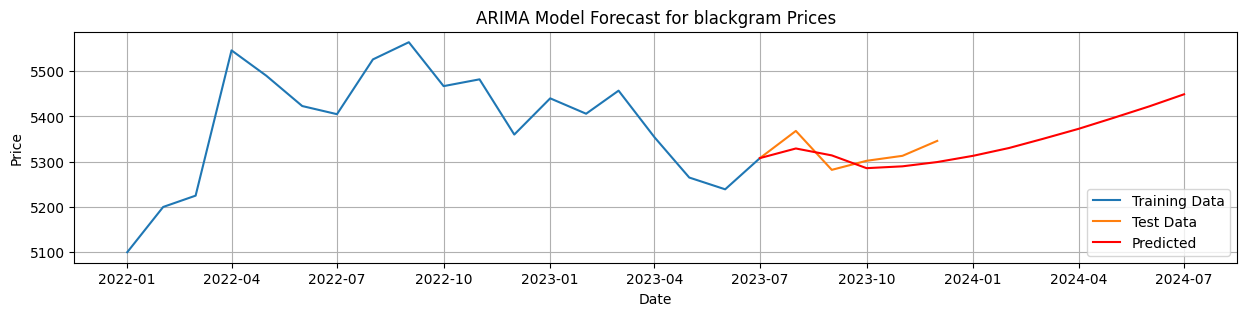

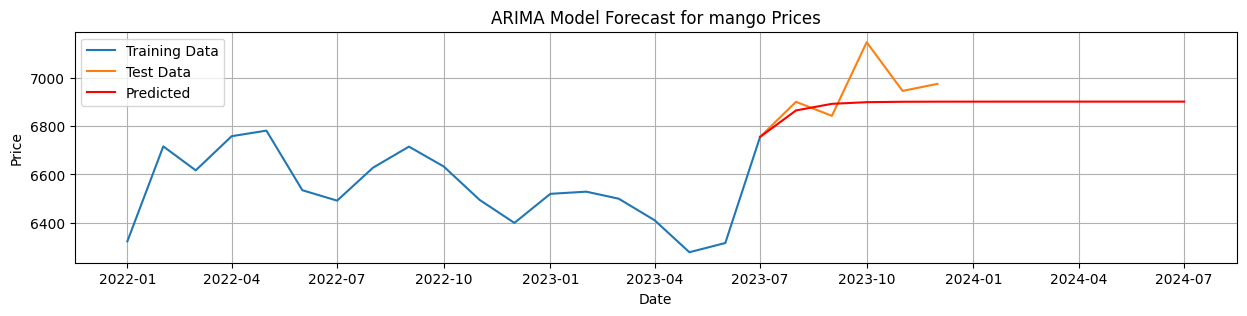

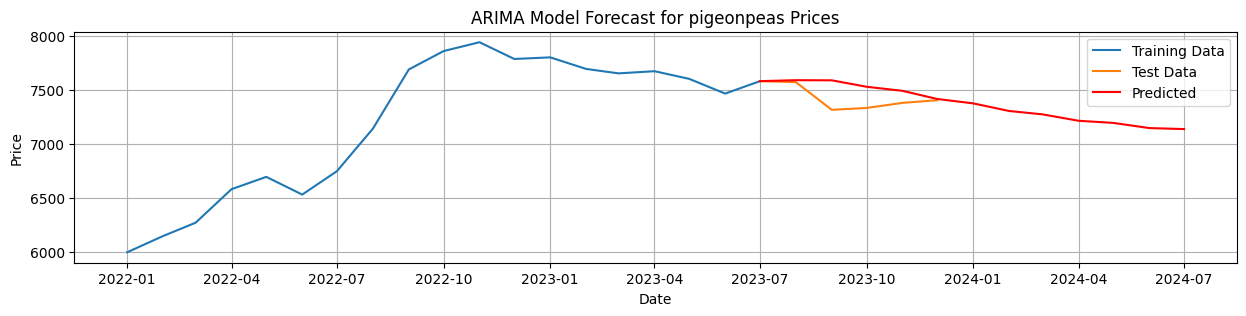

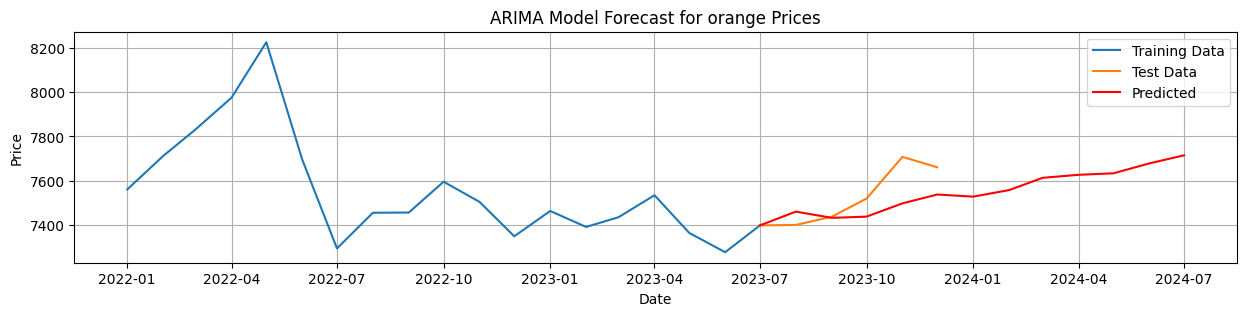

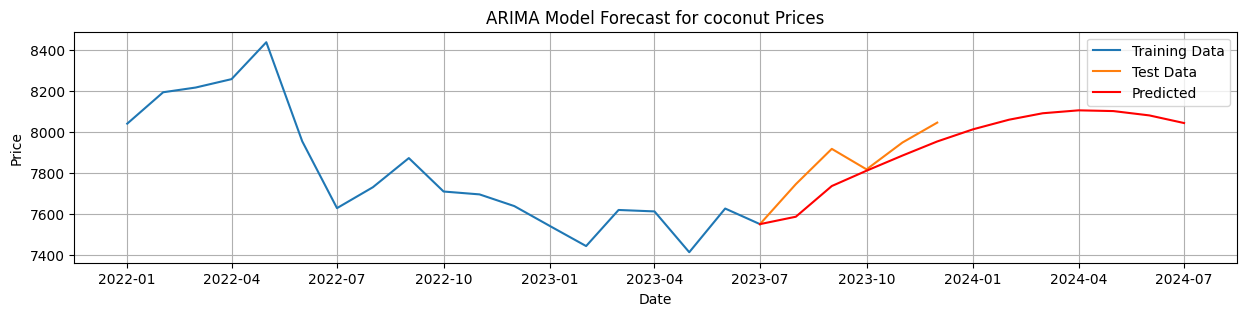

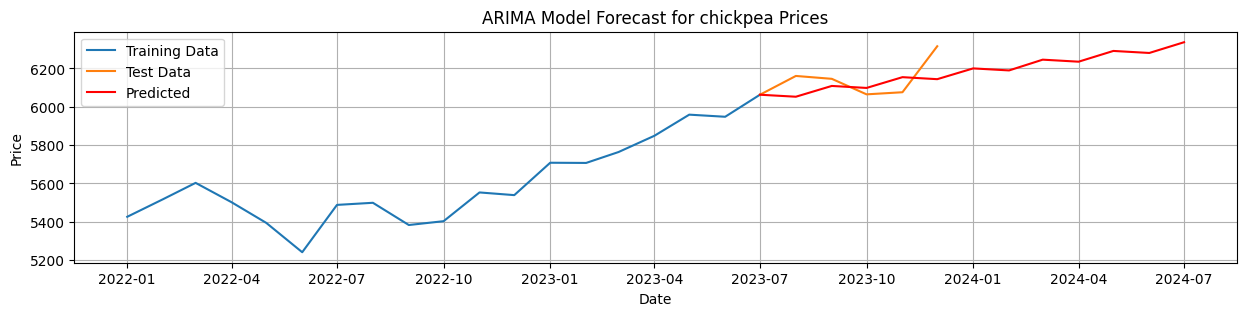

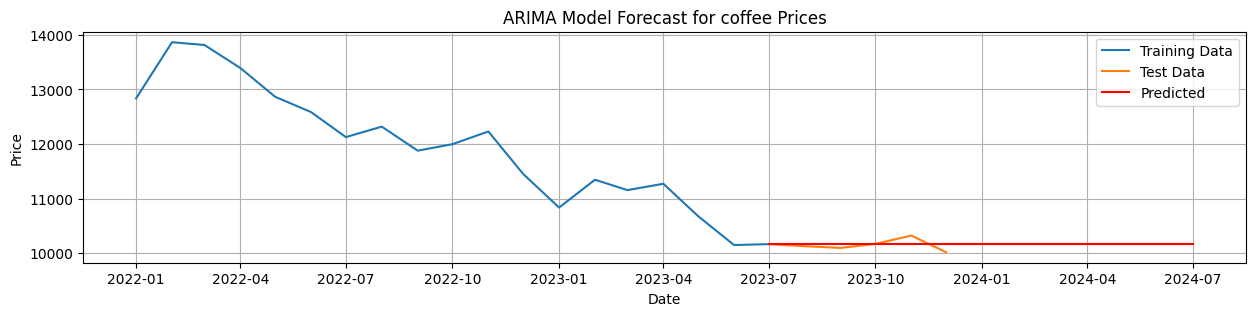

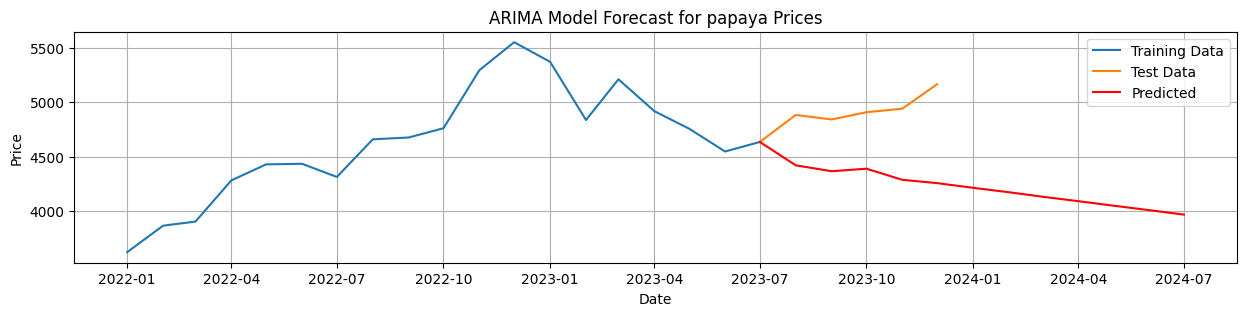

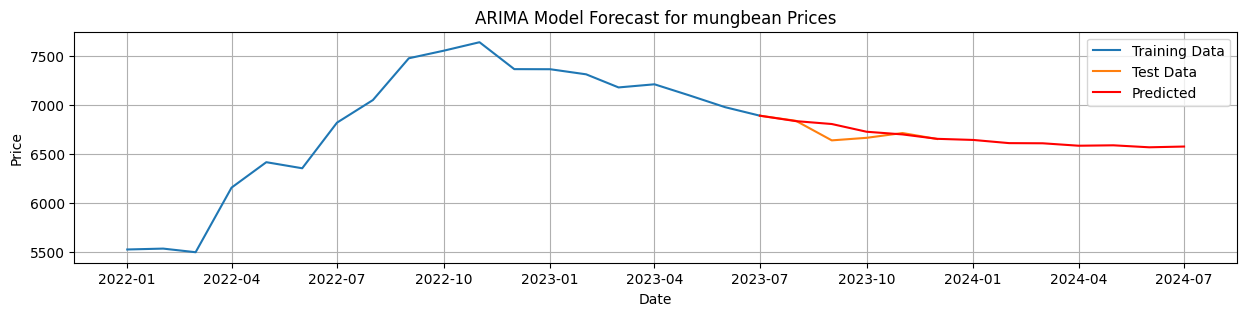

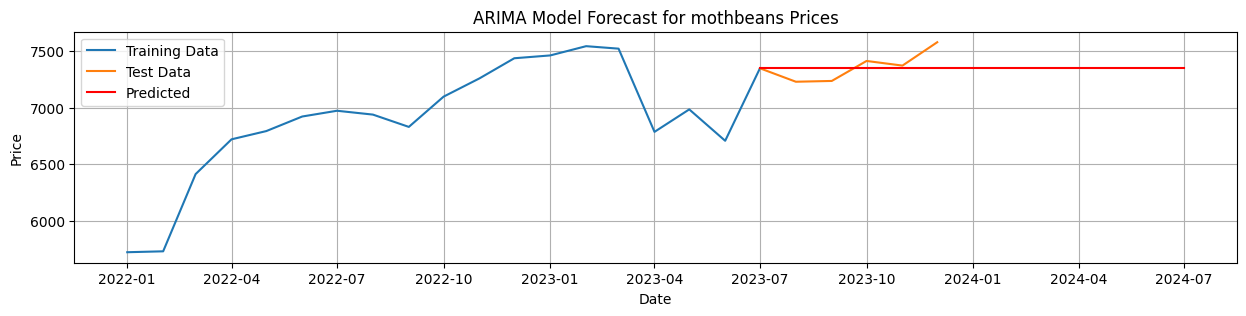

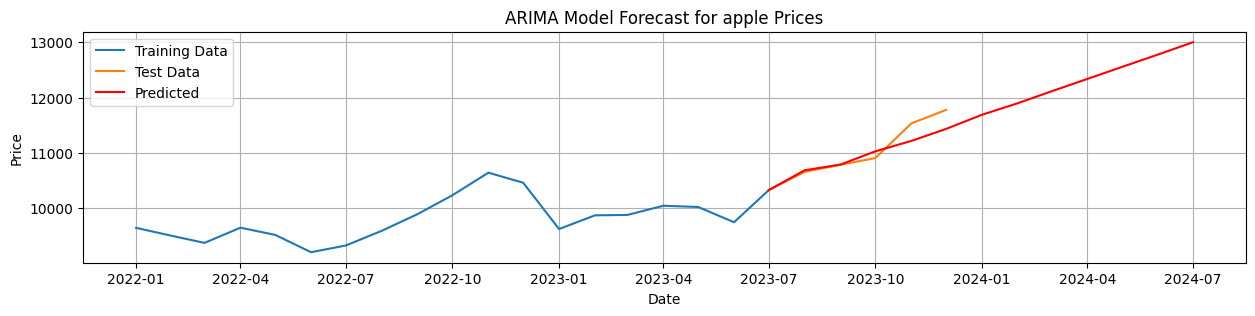

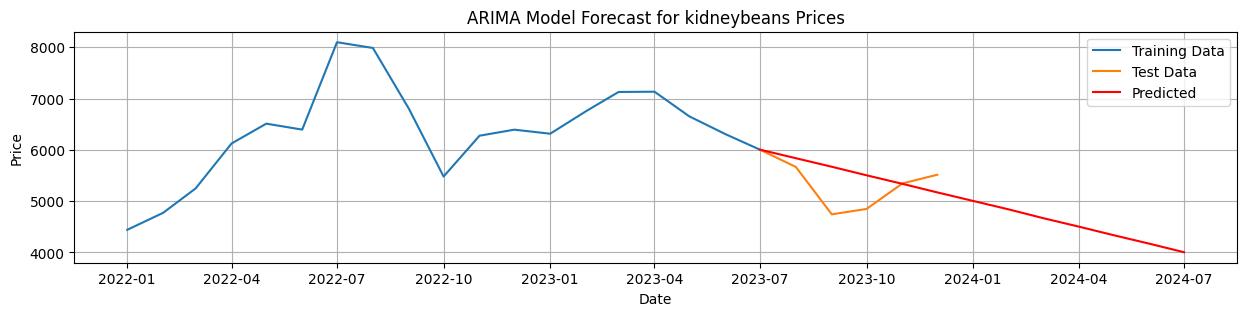

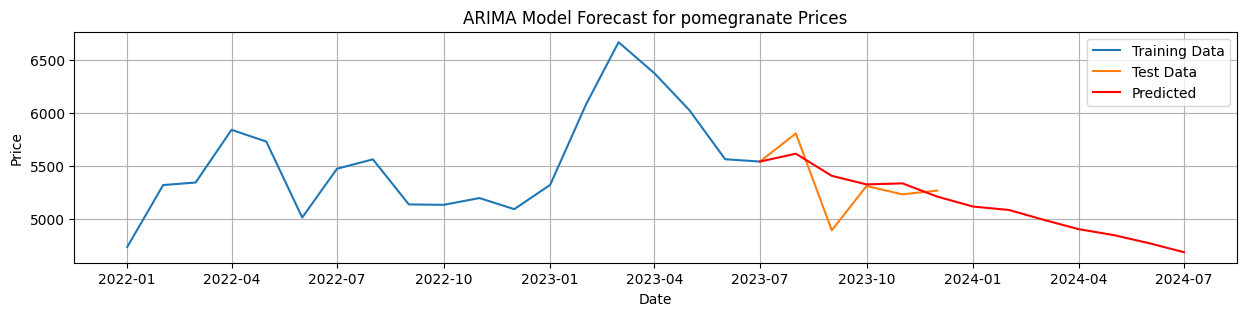

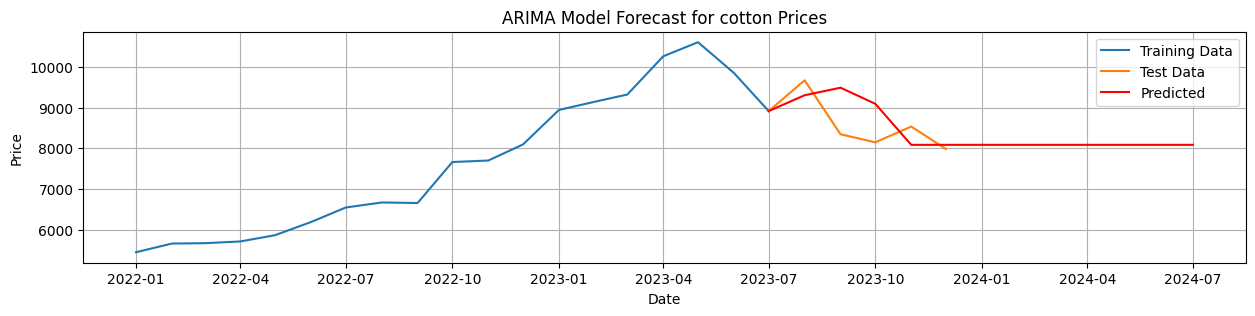

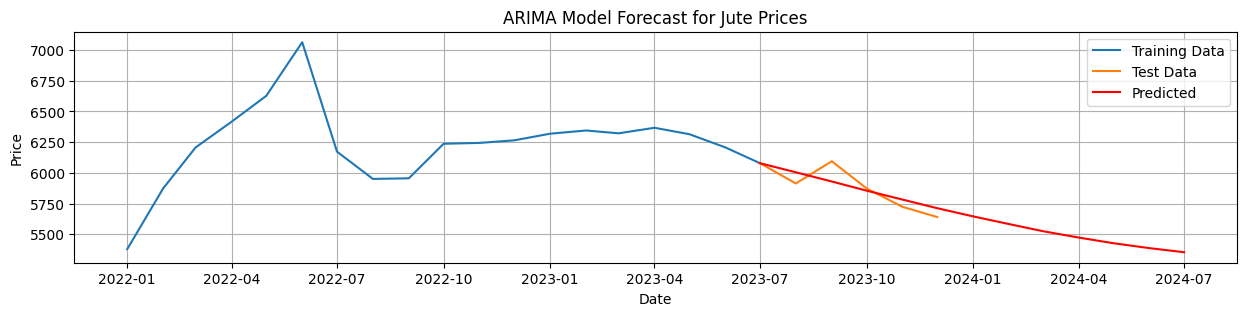

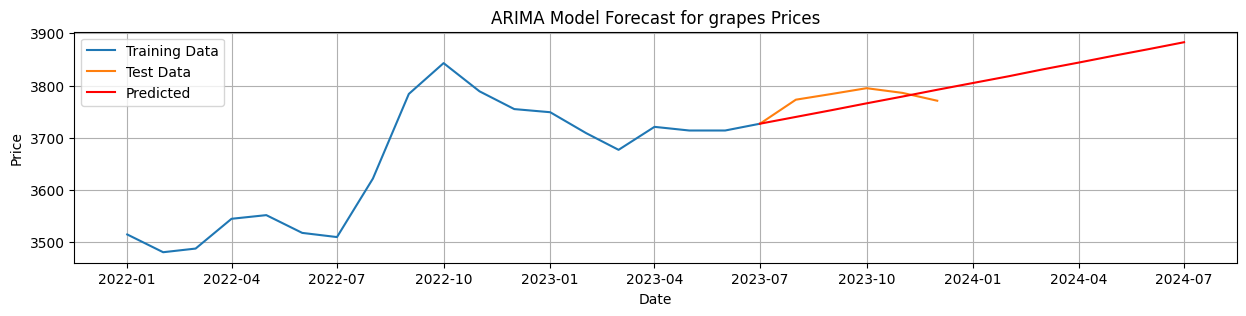

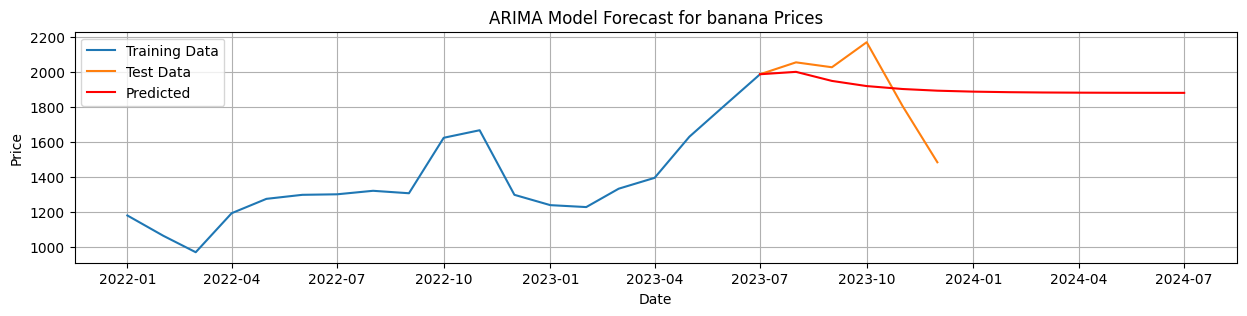

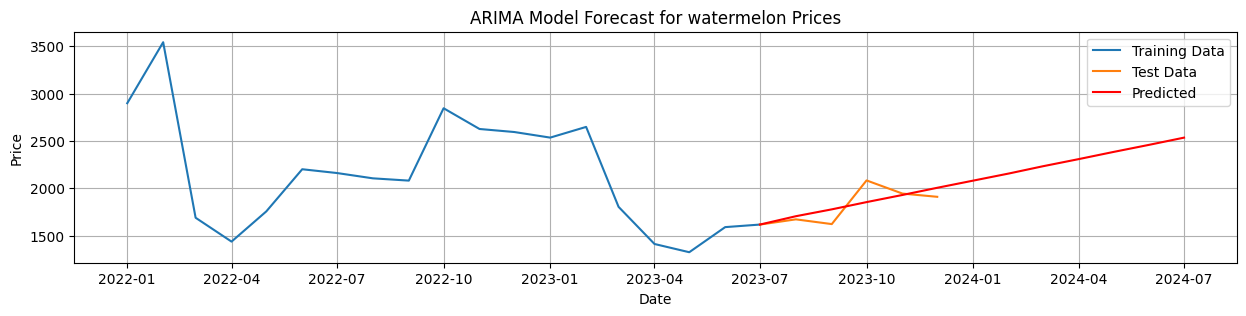

In [48]:
for index, row in best_orders_df.iterrows():
    label = row['label']
    order = row['order']
    train_data = df_price[label].iloc[0:19]  
    test_data = df_price[label].iloc[18:]


    model = ARIMA(train_data, order=( int(order[1]),int(order[4]),int(order[7]) )   )  # ARIMA(p,d,q)
    fitted_model = model.fit()


    forecast = fitted_model.forecast(steps=12)
    forecast.loc[pd.Timestamp('2023-07')] = train_data[-1]
    forecast.sort_index(inplace=True)
    
    plt.figure(figsize=(15, 3))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Test Data')
    plt.plot(forecast, label='Predicted', color='red')
    plt.title(f'ARIMA Model Forecast for {label} Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

                                      SARIMAX Results                                      
Dep. Variable:                              orange   No. Observations:                   18
Model:             SARIMAX(1, 1, 3)x(1, 1, [1], 6)   Log Likelihood                 -73.951
Date:                             Fri, 14 Jun 2024   AIC                            161.902
Time:                                     12:50:34   BIC                            164.688
Sample:                                 01-01-2022   HQIC                           160.147
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4890      8.020     -0.061      0.951     -16.207      15.229
ma.L1          0.3433    14

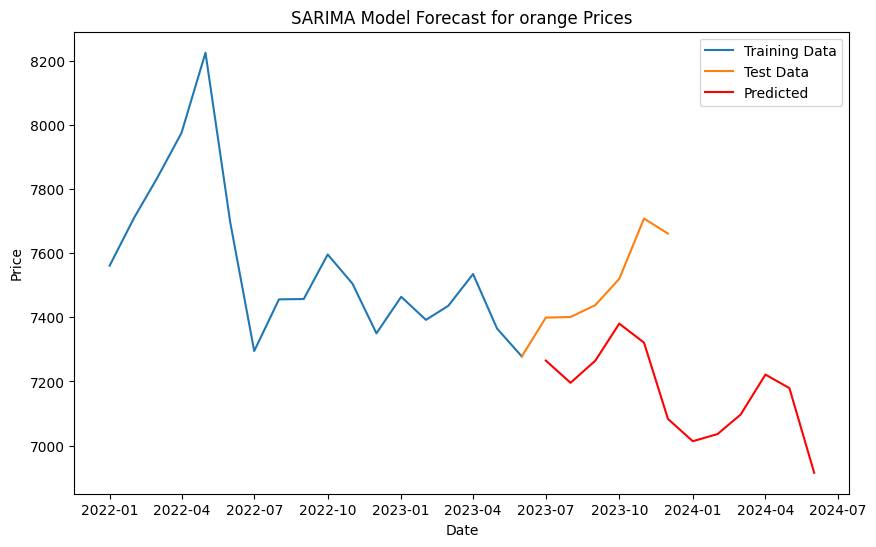

In [49]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df_price is your DataFrame containing the price data
train_data = df_price['orange'].iloc[:-6]
test_data = df_price['orange'].iloc[-7:]

try:
    # Train the SARIMA model
    model = SARIMAX(train_data, order=(1, 1, 3), seasonal_order=(1, 1, 1, 6))
    fitted_model = model.fit()

    # Print the model summary
    print(fitted_model.summary())

    # Forecast next 12 months
    forecast = fitted_model.forecast(steps=12)

    # Plot the actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Test Data')
    plt.plot(forecast, label='Predicted', color='red')
    plt.title('SARIMA Model Forecast for orange Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


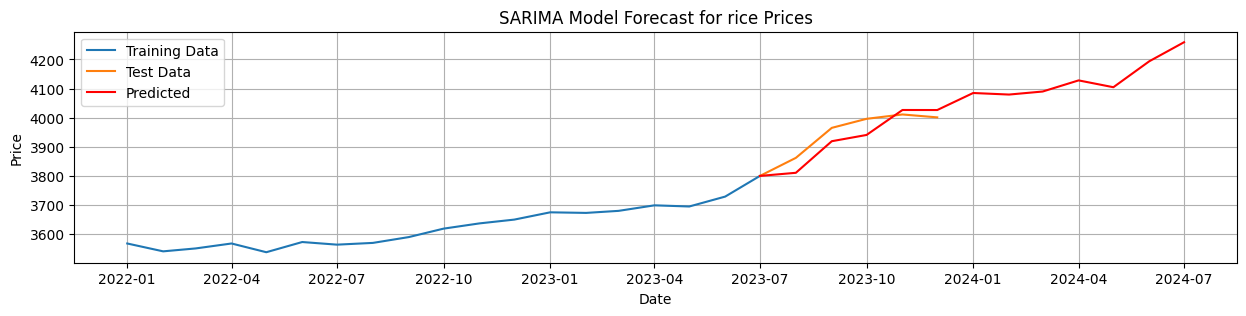

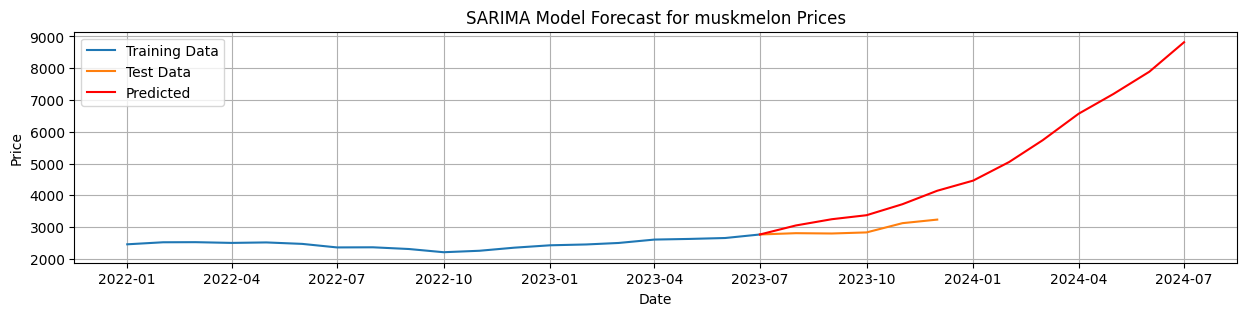

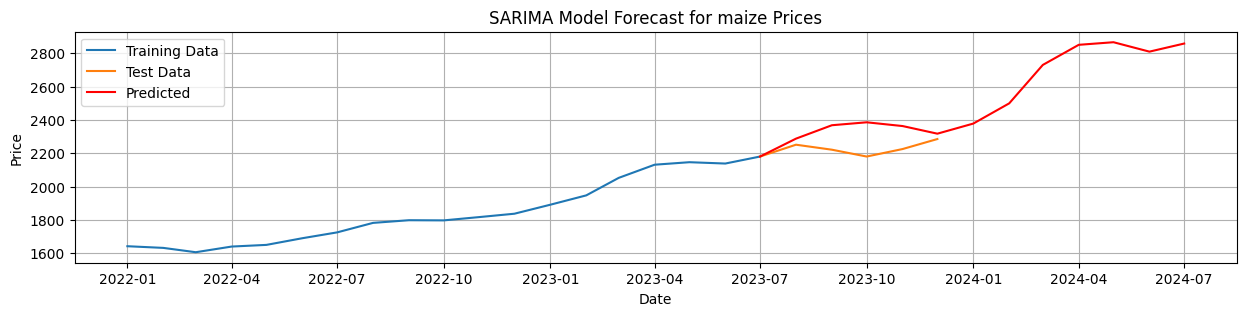

Error occurred for label lentil: Schur decomposition solver error.


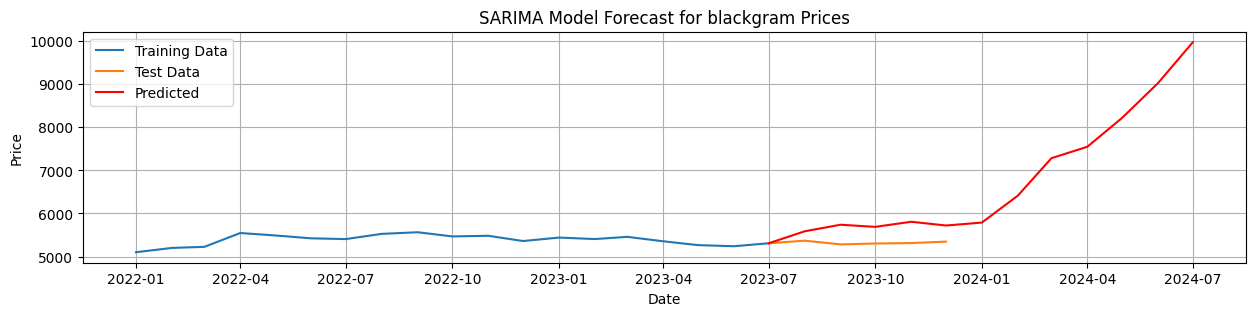

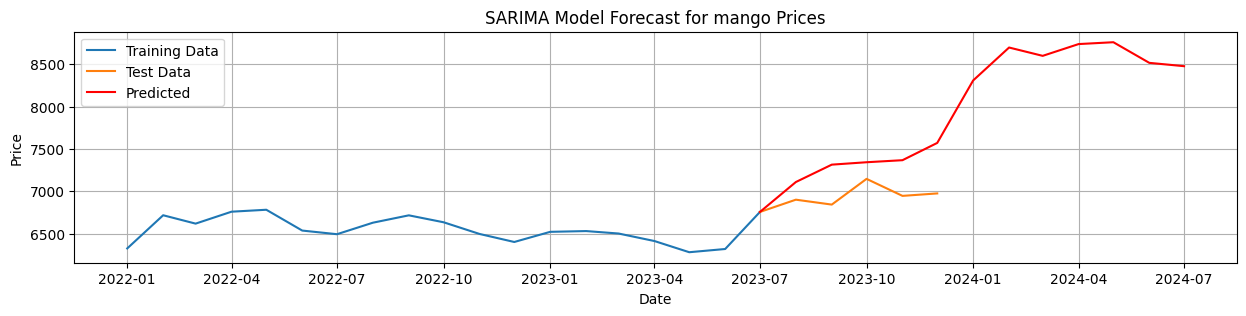

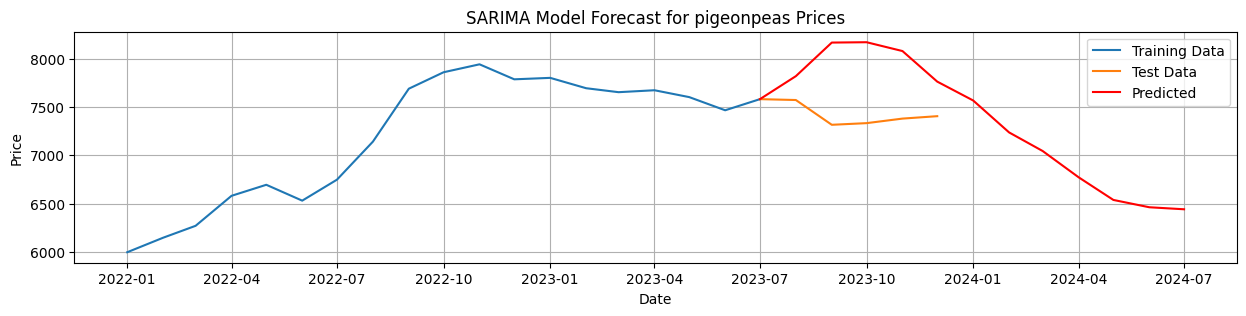

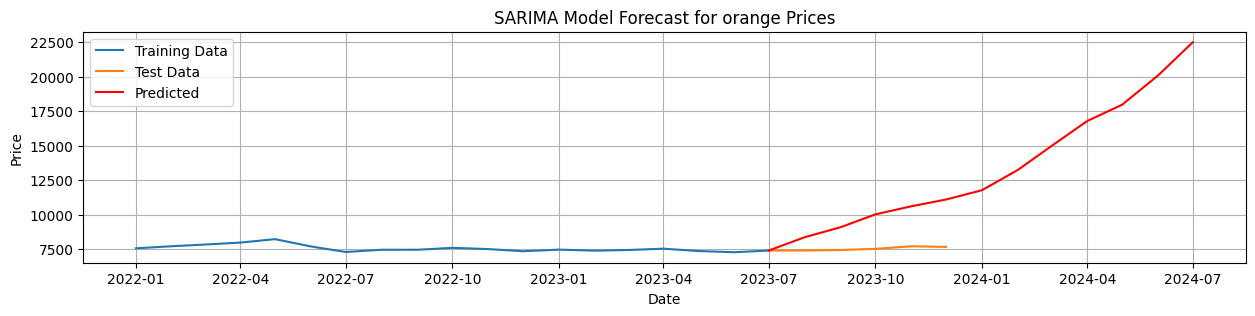

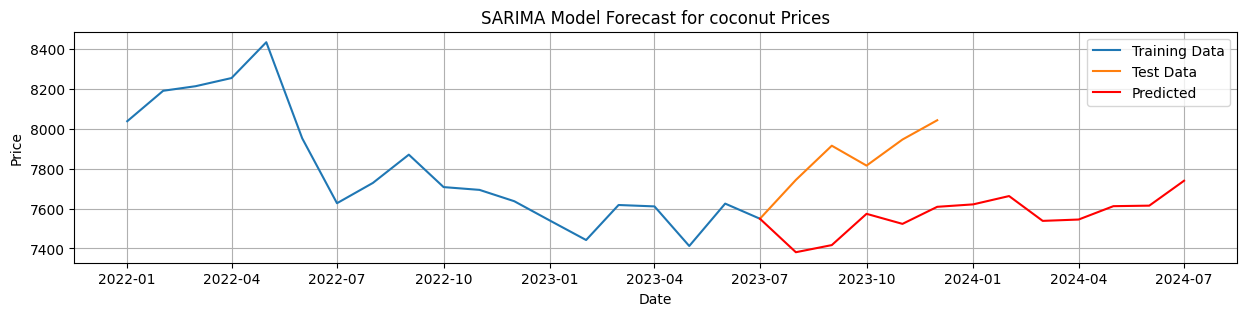

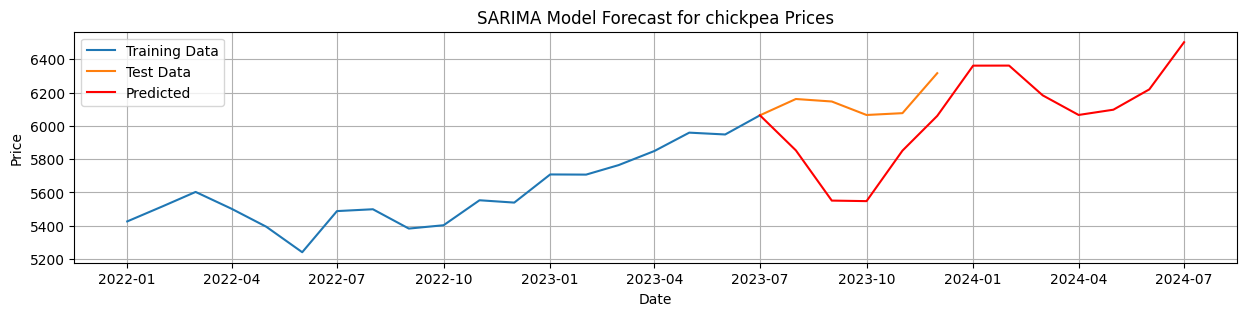

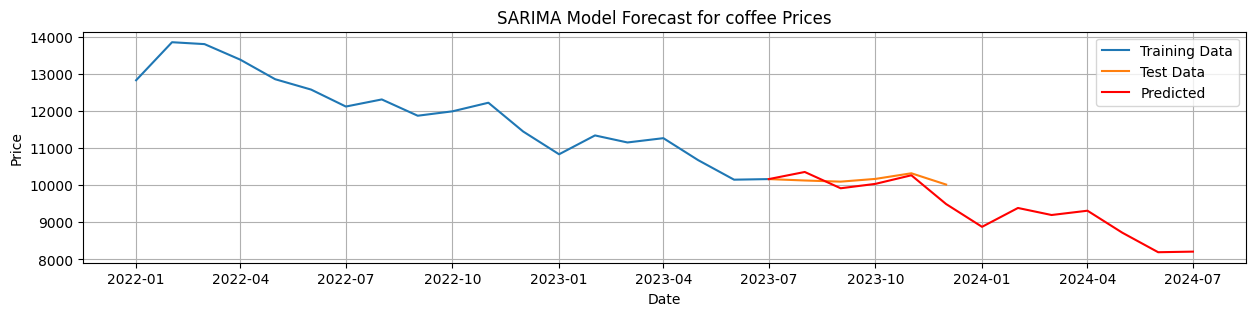

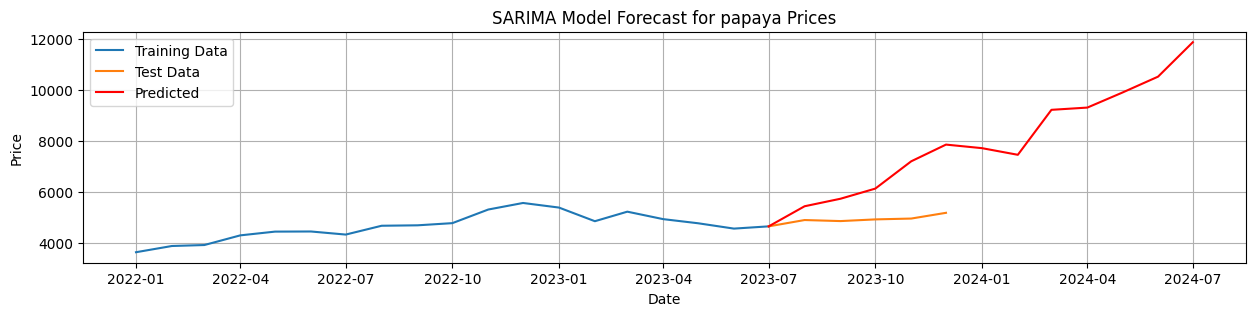

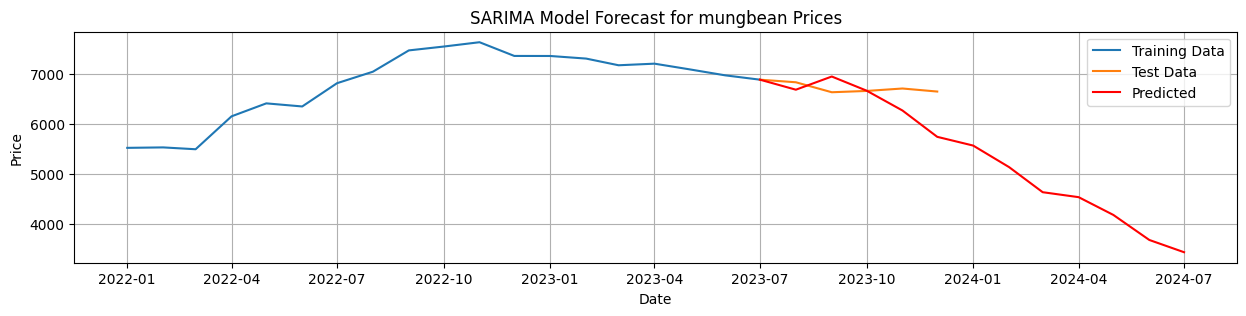

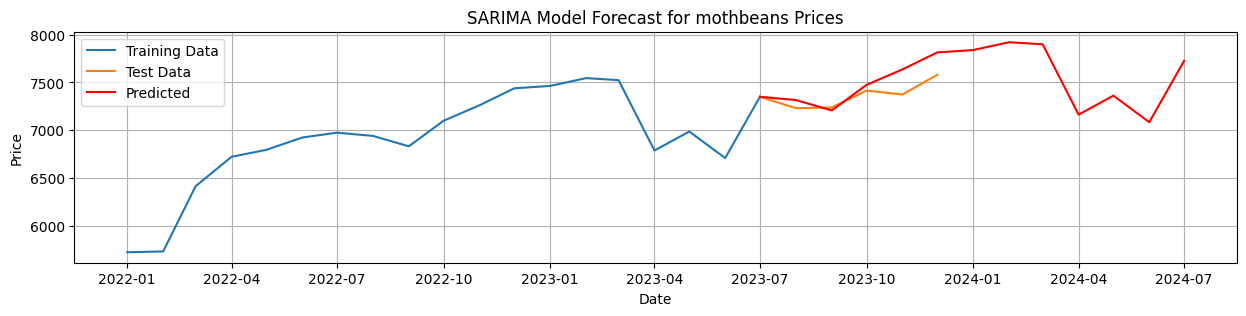

Error occurred for label apple: Schur decomposition solver error.


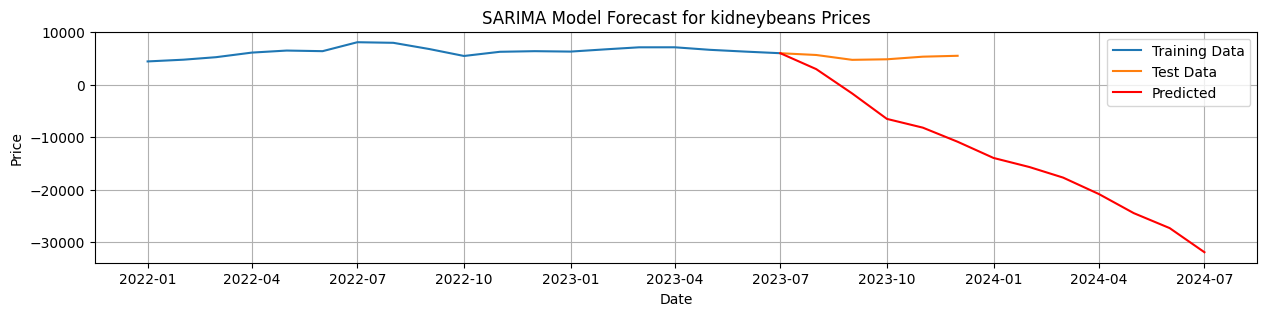

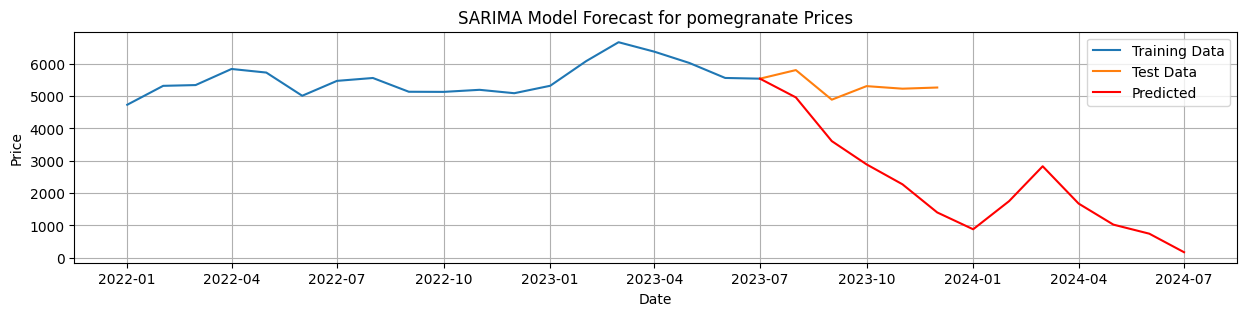

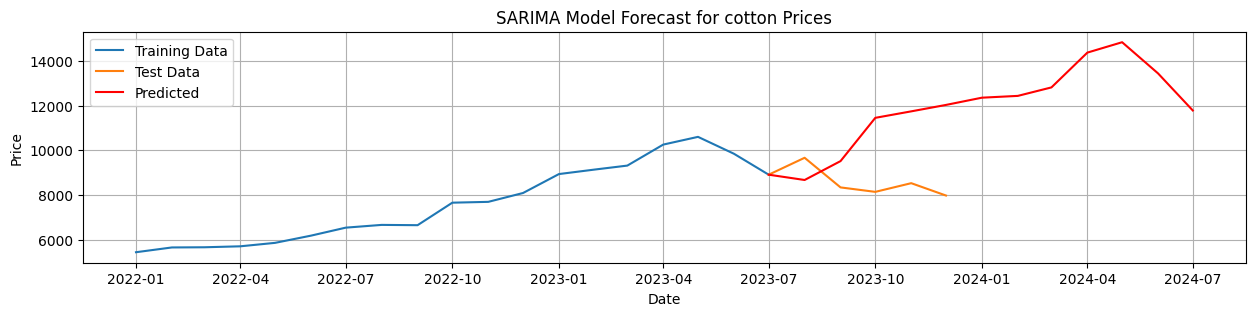

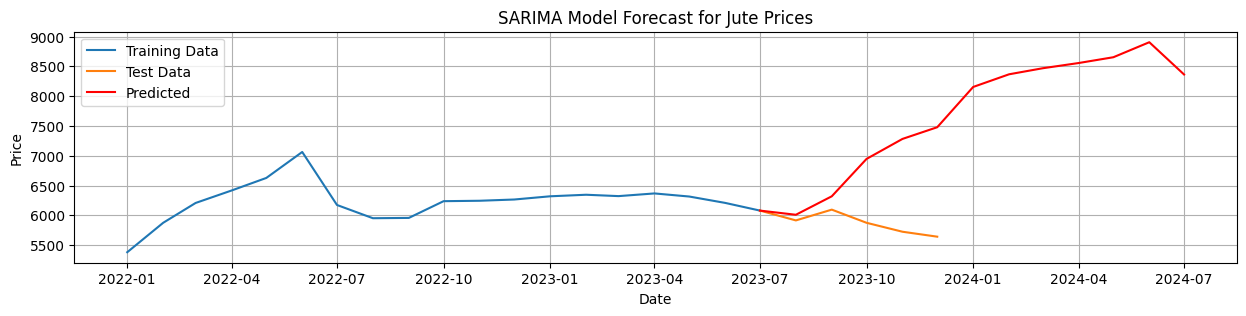

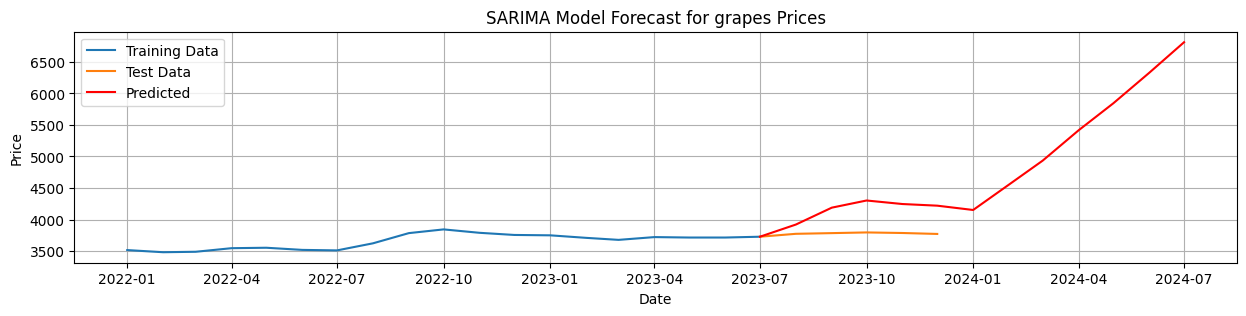

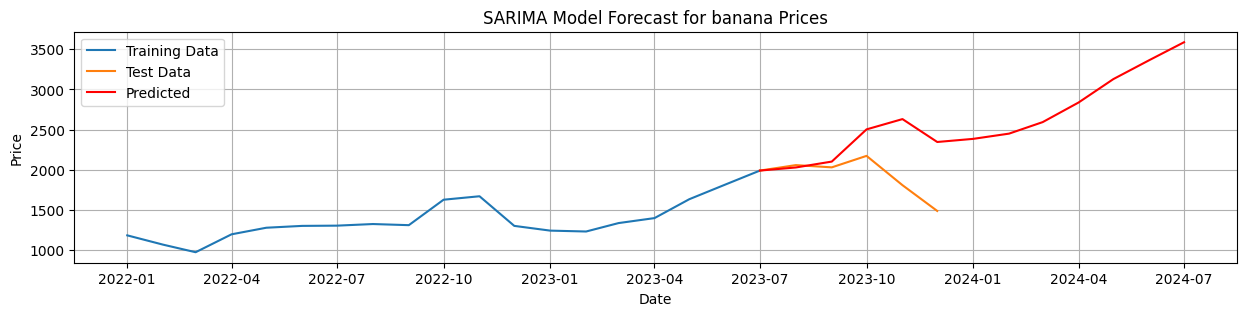

Error occurred for label watermelon: Schur decomposition solver error.


In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for index, row in best_orders_df.iterrows():
    label = row['label']
    order = row['order']
    train_data = df_price[label].iloc[0:19]  
    test_data = df_price[label].iloc[18:]

    try:
        model = SARIMAX(train_data, order=( int(order[1]),int(order[4]),int(order[7]) ), 
                        seasonal_order=( int(order[1]),int(order[4]),int(order[7]),12 ) )  # ARIMA(p,d,q)
        fitted_model = model.fit()

        forecast = fitted_model.forecast(steps=12)
        forecast.loc[pd.Timestamp('2023-07')] = train_data[-1]
        forecast.sort_index(inplace=True)
    except Exception as e:
        print(f"Error occurred for label {label}: {e}")
        continue
    
    plt.figure(figsize=(15, 3))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Test Data')
    plt.plot(forecast, label='Predicted', color='red')
    plt.title(f'SARIMA Model Forecast for {label} Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [59]:
best_arima = ['orange', 'chickpea', 'mungbean', 'Jute', 'apple', 'chickpea', 'kidneybeans', 'watermelon']
best_sarima = ['rice', 'mango','muskmelon', 'maize', 'blackgram', 'pigeonpeas', 'coconut', 'coffee', 'papaya', 'mothbeans', 'pomegranate', 'cotton', 'grapes', 'banana']

In [60]:
forecast_price=pd.DataFrame()
for label in best_arima:
    order = best_orders_df.order[best_orders_df.label==label].values[0]
    train_data = df_price[label].iloc[0:19]
    test_data = df_price[label].iloc[18:]


    model = ARIMA(train_data, order=( int(order[1]),int(order[4]),int(order[7]) )   )  # ARIMA(p,d,q)
    fitted_model = model.fit()


    forecast = fitted_model.forecast(steps=12)
    forecast.loc[pd.Timestamp('2023-07-01')] = train_data[-1]
    forecast.sort_index(inplace=True)
    forecast_price[label] = forecast[0:]

In [61]:
for label in best_sarima:
    order = best_orders_df.order[best_orders_df.label==label].values[0]
    train_data = df_price[label].iloc[0:19]
    test_data = df_price[label].iloc[18:]


    model = SARIMAX(train_data, order=( int(order[1]),int(order[4]),int(order[7]) ),
                        seasonal_order=( int(order[1]),int(order[4]),int(order[7]),12 ) )  # ARIMA(p,d,q)
    fitted_model = model.fit()

    forecast = fitted_model.forecast(steps=12)
    forecast.loc[pd.Timestamp('2023-07-01')] = train_data[-1]
    forecast.sort_index(inplace=True)
    forecast_price[label] = forecast[0:]

In [62]:
forecast_price.tail()

,orange,chickpea,mungbean,Jute,apple,kidneybeans,watermelon,rice,mango,muskmelon,...,blackgram,pigeonpeas,coconut,coffee,papaya,mothbeans,pomegranate,cotton,grapes,banana
2024-03-01,7613.560010,6246.010504,6611.218568,5526.209442,12113.319206,4671.774558,2233.130798,4089.760693,8600.088589,5734.817737,...,7284.013179,7043.761277,7538.244815,9199.0,9205.195565,7900.0,2830.890289,12812.086220,4934.231707,2592.495906
2024-04-01,7627.100667,6235.435081,6586.314403,5474.170883,12337.907142,4505.121378,2308.779413,4127.972943,8739.350832,6567.549787,...,7549.965075,6772.574171,7545.003532,9315.0,9293.415255,7163.0,1676.329900,14365.848624,5415.304878,2836.996297
2024-05-01,7633.884471,6291.562480,6590.523459,5428.054348,12555.842660,4338.468198,2384.427729,4104.519211,8761.176981,7188.281836,...,8220.916971,6538.337681,7612.143813,8722.0,9877.634945,7362.0,1024.769512,14829.586888,5844.378049,3128.299422
2024-06-01,7678.538607,6280.947724,6570.255872,5388.182382,12779.233044,4171.815018,2460.076122,4193.639481,8517.346143,7888.013885,...,9028.868868,6462.732621,7614.792770,8194.0,10505.854636,7084.0,744.209123,13437.281221,6328.451220,3364.116433
2024-07-01,7715.023115,6337.034479,6577.988990,5354.763239,13001.425994,4005.161838,2535.724495,4259.028789,8478.015272,8816.745935,...,9977.820764,6441.839492,7739.979951,8210.0,11856.074326,7726.0,170.648734,11781.395312,6812.524390,3587.450082


In [63]:
forecast_price.mango

2023-07-01    6755.000000
2023-08-01    7108.737050
2023-09-01    7314.177528
2023-10-01    7342.567242
2023-11-01    7366.714246
2023-12-01    7570.891824
2024-01-01    8309.380061
2024-02-01    8698.523316
2024-03-01    8600.088589
2024-04-01    8739.350832
2024-05-01    8761.176981
2024-06-01    8517.346143
2024-07-01    8478.015272
Name: mango, dtype: float64